In [14]:
# 1. Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# 2. Load the dataset
df = pd.read_csv(r'C:\Users\asmit\Downloads\archive (1)\machine_failure_dataset.csv')

# Display the first few rows of the dataset to understand its structure
df.head()


,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,27.931972,Drill,1
3,85.230299,46.765316,9.384077,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,32.782766,Drill,1


In [16]:
# 3. Check for missing values
print(df.isnull().sum())


Temperature     0
Vibration       0
Power_Usage     0
Humidity        0
Machine_Type    0
Failure_Risk    0
dtype: int64


In [17]:
# 4. Basic data types and description
print(df.info())  # Shows data types and non-null counts
print(df.describe())  # Summary statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   1000 non-null   float64
 1   Vibration     1000 non-null   float64
 2   Power_Usage   1000 non-null   float64
 3   Humidity      1000 non-null   float64
 4   Machine_Type  1000 non-null   object 
 5   Failure_Risk  1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB
None
       Temperature    Vibration  Power_Usage     Humidity  Failure_Risk
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000
mean     70.193321    50.354181    10.011668    29.906404      0.300000
std       9.792159     4.987272     1.966909     5.135663      0.458487
min      37.587327    35.298057     3.960976    15.352757      0.000000
25%      63.524097    46.968792     8.704001    26.312898      0.000000
50%      70.253006    50.315386     9.999498    30.

In [19]:
# Handle missing values
# For numeric columns, fill with the median
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# For categorical columns, fill with the mode (most frequent value)
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)


In [20]:
# 6. Check for duplicates
print(f'Duplicates: {df.duplicated().sum()}')
# Remove duplicates if any
df.drop_duplicates(inplace=True)


Duplicates: 0


In [25]:
print(df.columns)


Index(['Temperature', 'Vibration', 'Power_Usage', 'Humidity', 'Machine_Type',
       'Failure_Risk'],
      dtype='object')


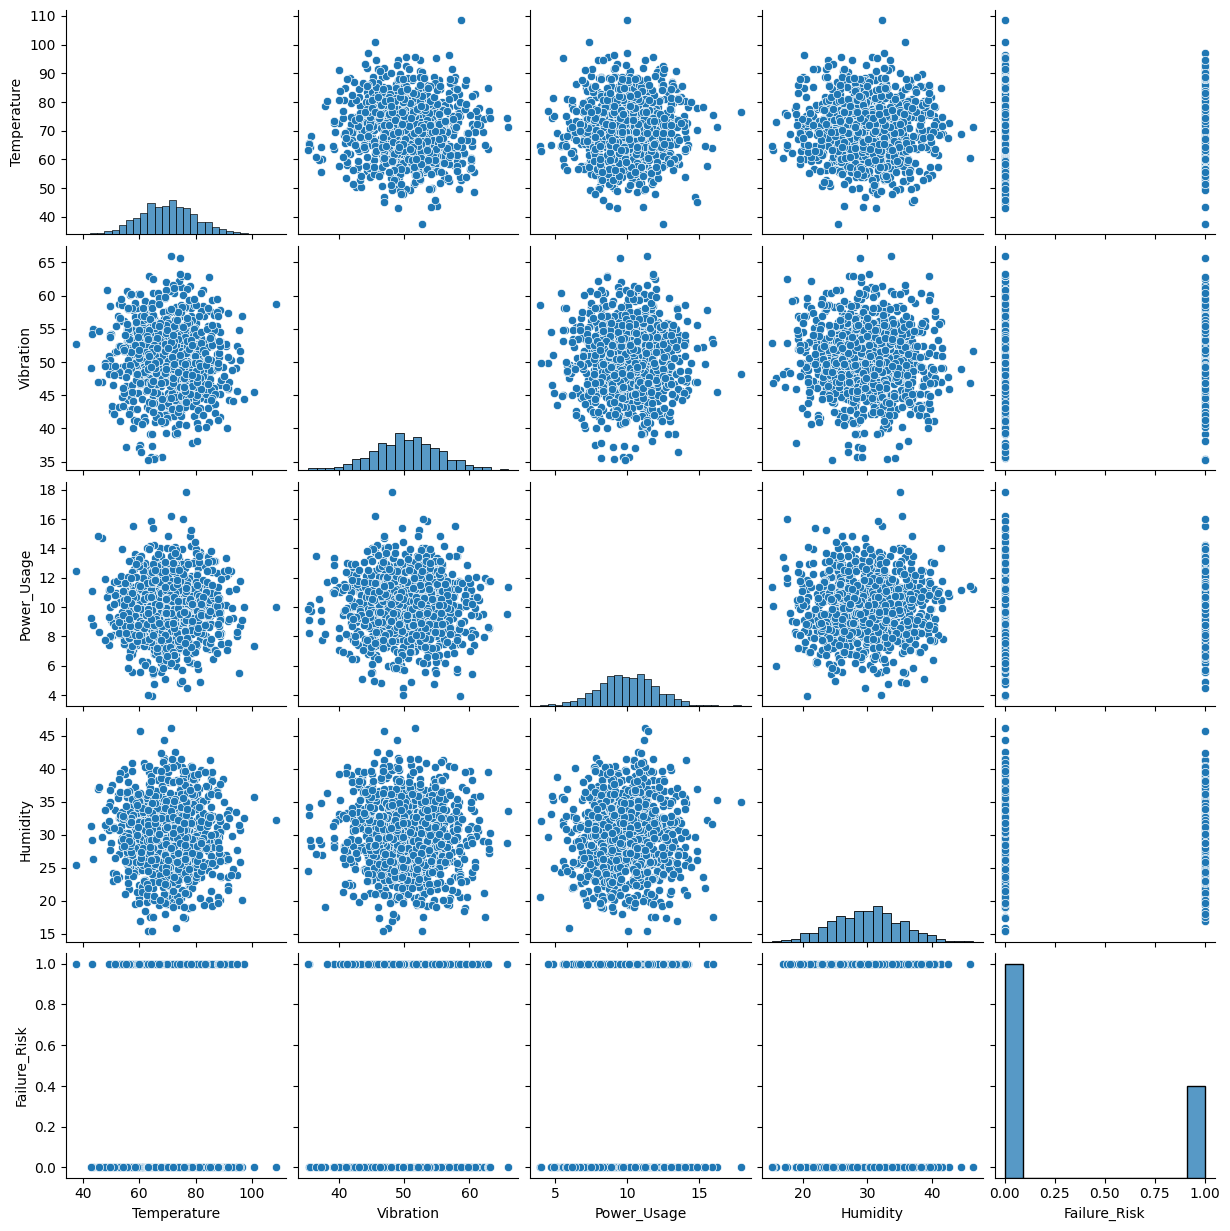

In [29]:
# 8. Visualize relationships between features
# If no target column exists, simply plot pairwise relationships between all numerical features
sns.pairplot(df)  # This will visualize the relationships between all features
plt.show()


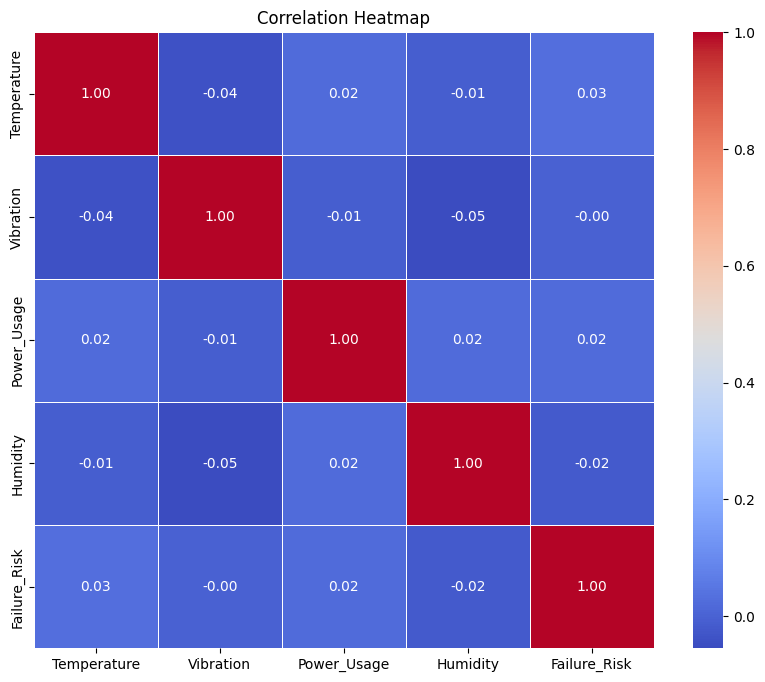

In [31]:
# 9. Visualize the correlation matrix using a heatmap for only numerical columns
# Select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=['number']).columns  # Get numerical columns only
corr_matrix = df[numerical_cols].corr()  # Compute the correlation matrix for the numerical columns

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


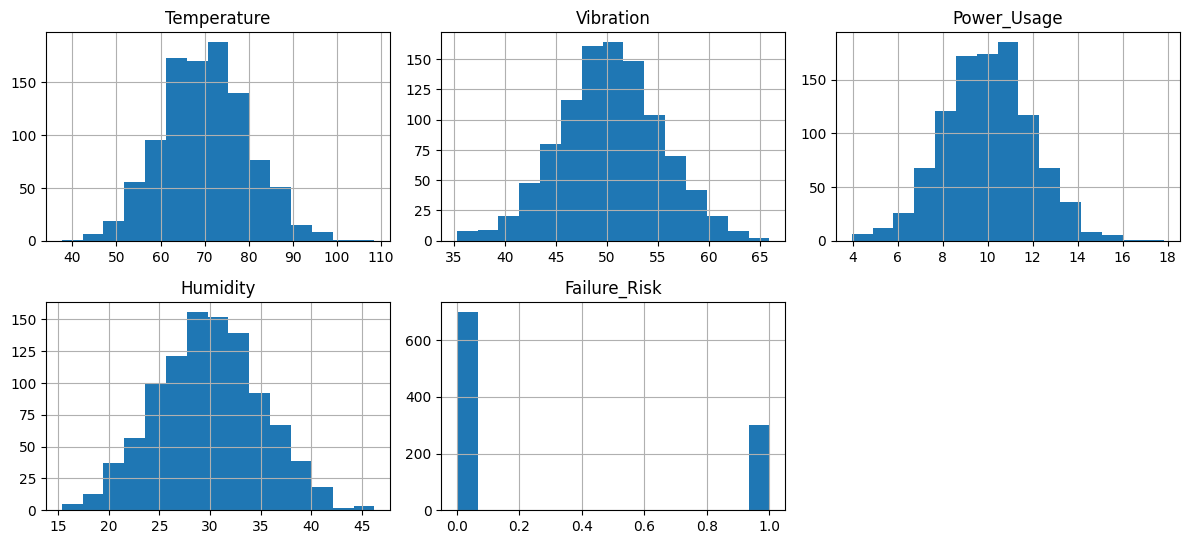

In [32]:
# 10. Visualize distribution of numerical columns
# Using histograms to show the distribution of each numerical column
df[numerical_cols].hist(bins=15, figsize=(12, 8), layout=(3, 3))  # Adjust layout based on number of columns
plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Sample DataFrame (you can replace this with your actual DataFrame)
df = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Value': [10, 15, 7, 20, 25, 12, 30, 35, 22]
})

# Function to plot the selected graph type
def plot_graph(graph_type):
    plt.figure(figsize=(10, 6))
    
    if graph_type == 'Boxplot':
        sns.boxplot(x='Category', y='Value', data=df)
        plt.title('Boxplot for Category vs Value')
    elif graph_type == 'Scatter Plot':
        sns.scatterplot(x='Category', y='Value', data=df)
        plt.title('Scatter Plot for Category vs Value')
    elif graph_type == 'Histogram':
        sns.histplot(df['Value'], kde=True)
        plt.title('Histogram for Value')
    elif graph_type == 'Bar Plot':
        sns.barplot(x='Category', y='Value', data=df)
        plt.title('Bar Plot for Category vs Value')
    
    plt.show()

# Create a dropdown widget for selecting the graph type
dropdown = widgets.Dropdown(
    options=['Boxplot', 'Scatter Plot', 'Histogram', 'Bar Plot'],
    value='Boxplot',  # default graph
    description='Graph Type:'
)

# Link the dropdown to the plot function
widgets.interactive(plot_graph, graph_type=dropdown)


interactive(children=(Dropdown(description='Graph Type:', options=('Boxplot', 'Scatter Plot', 'Histogram', 'Ba…